In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline

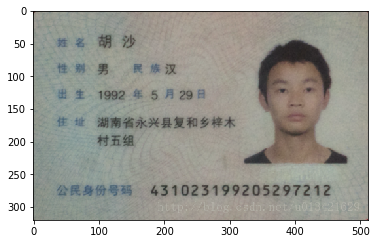

In [62]:
img_s=cv2.imread("D:\\tmp\\IDCard001.png")
# img_s=cv2.imread("D:\\tmp\\IDCard002.jpg")
# img_s=cv2.imread("D:\\tmp\\IDCard003.jpg")
# img_s=cv2.imread("D:\\tmp\\IDCard004.jpg")
# img_s=cv2.imread("D:\\tmp\\IDCard005.jpg")
# img_s=cv2.imread("D:\\tmp\\IDCard006.jpg")
img_s=cv2.cvtColor(img_s, cv2.COLOR_BGR2RGB)
plt.imshow(img_s)

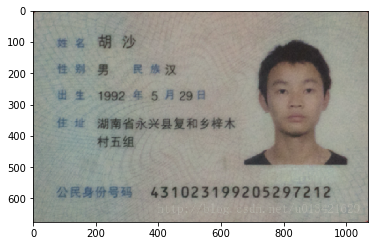

In [63]:
img_rs=cv2.resize(img_s,(214*5, 135*5),interpolation=cv2.INTER_AREA )
plt.imshow(img_rs)

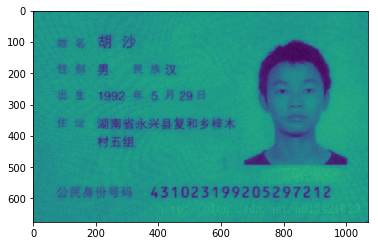

In [64]:
img_g=cv2.cvtColor(img_rs,cv2.COLOR_RGB2GRAY)
plt.imshow(img_g)

In [65]:
###########识别图片文本信息信息
def text_recognize(gray,top,bottom,left,right,bin_threshold=90,lang="eng",config=""):
    region=gray[top:bottom,left:right]
    plt.imshow(region)
    cv2.normalize(region,region, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    plt.imshow(region)
    ret,region_bin=cv2.threshold(region,bin_threshold,255,cv2.THRESH_BINARY)
    plt.imshow(region_bin)
    code = pytesseract.image_to_string(region_bin,lang,config)
    return code.replace("\n","").strip()

'胡 沙'

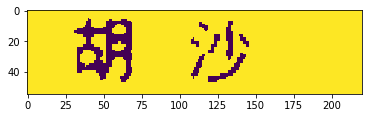

In [66]:
card_name=text_recognize(img_g,75,130,180,400,lang="chi_sim")
card_name

'男'

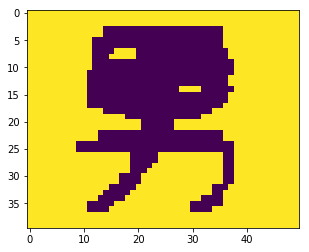

In [67]:
card_sex=text_recognize(img_g,170,210,200,250,lang="chi_sim",config="-psm 10")
card_sex

'汊'

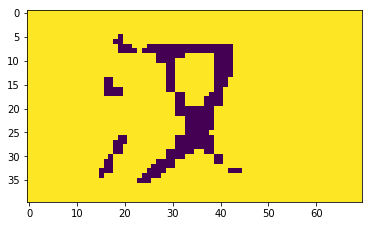

In [68]:
card_nation=text_recognize(img_g,170,210,410,480,lang="chi_sim",config="-psm 8")
card_nation

'431023199205297212'

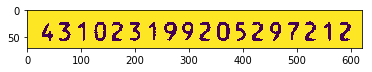

In [69]:
card_id=text_recognize(img_g,540,610,350,970,config="-psm 8")
card_id

'湖南省永兴县纂粕乡梓木村五组'

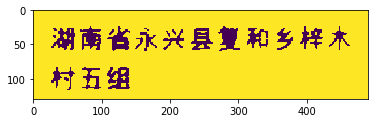

In [70]:
card_addr=text_recognize(img_g,320,450,180,670,bin_threshold=100,lang="chi_sim")
card_addr

'1992'

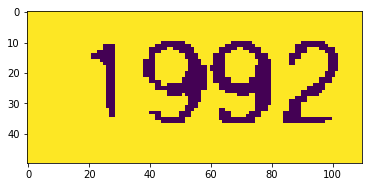

In [71]:
card_year=text_recognize(img_g,250,300,190,300,config="-psm 8")
card_year

'5'

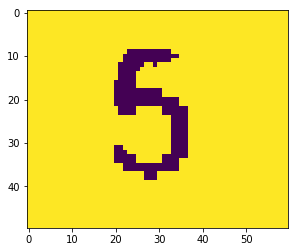

In [72]:
card_month=text_recognize(img_g,250,300,360,420,config="-psm 8")
card_month

'29'

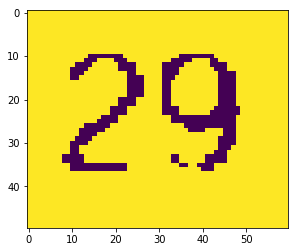

In [73]:
card_day=text_recognize(img_g,250,300,460,520,config="-psm 8")
card_day

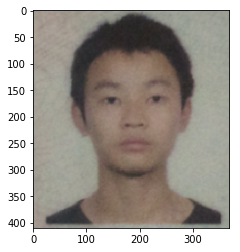

In [74]:
card_photo=img_rs[90:500,650:1020]
plt.imshow(card_photo)

In [75]:
print("姓名："+card_name)
print("性别："+card_sex)
print("民族："+card_nation)
print("出生日期："+card_year+"年"+card_month+"月"+card_day+"日")
print("地址："+card_addr)
print("证件号码："+card_id)

姓名：胡 沙
性别：男
民族：汊
出生日期：1992年5月29日
地址：湖南省永兴县纂粕乡梓木村五组
证件号码：431023199205297212
